### TD법

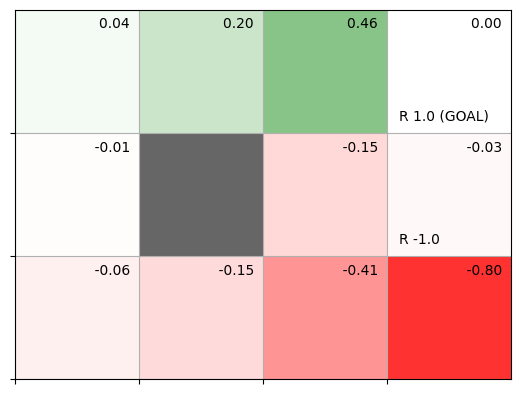

In [8]:
from collections import defaultdict
from pickletools import read_uint1
from random import sample

import numpy as np
from requests.packages import target

from common.gridworld import GridWorld


class TdAgent:
    def __init__(self):
        self.gamma = 0.9
        self.alpha = 0.1
        self.action_size = 4

        random_actions = {0:0.25, 1:0.25, 2:0.25, 3:0.25}
        self.pi = defaultdict(lambda: random_actions)
        self.V = defaultdict(lambda: 0)

    def get_action(self, state):
        action_probs = self.pi[state]
        action = list(action_probs.keys())
        probs = list(action_probs.values())
        return np.random.choice(action, p=probs)
    def eval(self, state, reward, next_state, done):
        next_V = 0 if done else self.V[next_state]
        target = reward + self.gamma * next_V
        self.V[state] += (target - self.V[state]) * self.alpha


env = GridWorld()
agent = TdAgent()

episodes = 1000
for episode in range(episodes):
    state = env.reset()

    while True:
        action = agent.get_action(state)
        next_state, reward, done = env.step(action)

        agent.eval(state, reward, next_state, done)
        if done:
            break
        state = next_state
env.render_v(agent.V)


### SARSA

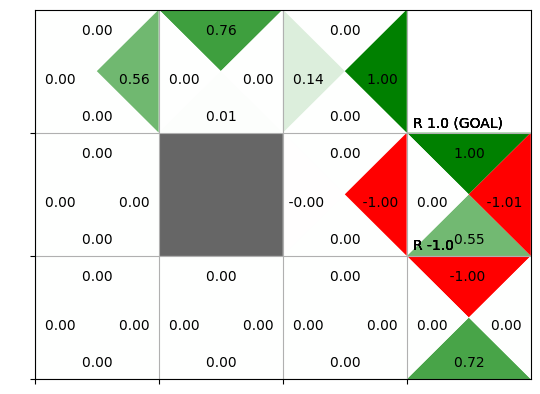

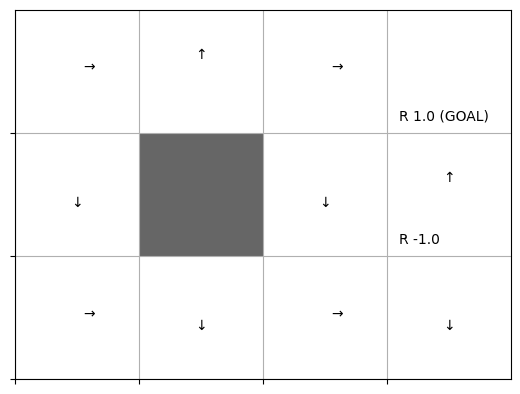

In [9]:
from collections import defaultdict, deque
import numpy as np
from common.gridworld import GridWorld
from common.utils import greedy_probs


class SarsaaAgent:
    def __init__(self):
        self.gamma = 0.9
        self.alpha = 0.8
        self.epsilon = 0.1
        self.action_size = 4

        random_actions = {0:0.25, 1:0.25, 2:0.25, 3:0.25}
        self.pi = defaultdict(lambda: random_actions)
        self.Q = defaultdict(lambda: 0)
        self.memory = deque(maxlen=2)

    def get_action(self, state):
        action_probs = self.pi[state]
        actions = list(action_probs.keys())
        probs = list(action_probs.values())
        return np.random.choice(actions, p=probs)

    def reset(self):
        self.memory.clear()

    def update(self, state, action, reward, done):
        self.memory.append((state, action, reward, done))
        if len(self.memory) < 2:
            return
        state, action, reward, done = self.memory[0]
        nnext_state, next_action, _, _ = self.memory[1]

        next_q = 0 if done else self.Q[next_state, next_action]

        target = reward + self.gamma * next_q
        self.Q[state, action] += (target - self.Q[state, action]) * self.alpha

        self.pi[state] = greedy_probs(self.Q, state, self.epsilon)

env = GridWorld()
agent = SarsaaAgent()

episodes = 10000

for episode in range(episodes):
    state = env.reset()
    agent.reset()

    while True:
        action = agent.get_action(state)
        next_state, reward, done = env.step(action)

        agent.update(state, action, reward, done)

        if done:
            agent.update(next_state, None, None, None)
            break
        state = next_state

env.render_q(agent.Q)

### Importance Sampling

In [10]:
import numpy as np

x = np.array([1, 2, 3])
pi =  np.array([0.1, 0.1, 0.8])

e = np.sum(x * pi)
print('참값(E_pi[x]):', e)

n = 100
samples = []
for _ in range(n):
    s = np.random.choice(x, p=pi)
    samples.append(s)
    mean = np.mean(samples)
    var = np.var(samples)
    print('몬테카를로법: {:.2f} (분산: {:.2f})'.format(mean, var))

b = np.array([1/3, 1/3, 1/3])
n = 100
samples = []

for _ in range(n):
    idx = np.arange(len(b))
    i = np.random.choice(idx, p=b)
    s = x[i]
    rho = pi[i] / b[i]
    samples.append(rho * s)


mean = np.mean(samples)
var = np.var(samples)
print('중요도 샘플링법: {:.2f} (분산: {:.2f})'.format(mean, var))

참값(E_pi[x]): 2.7
몬테카를로법: 3.00 (분산: 0.00)
몬테카를로법: 3.00 (분산: 0.00)
몬테카를로법: 3.00 (분산: 0.00)
몬테카를로법: 2.50 (분산: 0.75)
몬테카를로법: 2.60 (분산: 0.64)
몬테카를로법: 2.50 (분산: 0.58)
몬테카를로법: 2.57 (분산: 0.53)
몬테카를로법: 2.62 (분산: 0.48)
몬테카를로법: 2.44 (분산: 0.69)
몬테카를로법: 2.30 (분산: 0.81)
몬테카를로법: 2.18 (분산: 0.88)
몬테카를로법: 2.25 (분산: 0.85)
몬테카를로법: 2.31 (분산: 0.83)
몬테카를로법: 2.36 (분산: 0.80)
몬테카를로법: 2.40 (분산: 0.77)
몬테카를로법: 2.31 (분산: 0.84)
몬테카를로법: 2.35 (분산: 0.82)
몬테카를로법: 2.39 (분산: 0.79)
몬테카를로법: 2.42 (분산: 0.77)
몬테카를로법: 2.45 (분산: 0.75)
몬테카를로법: 2.48 (분산: 0.73)
몬테카를로법: 2.50 (분산: 0.70)
몬테카를로법: 2.52 (분산: 0.68)
몬테카를로법: 2.54 (분산: 0.66)
몬테카를로법: 2.48 (분산: 0.73)
몬테카를로법: 2.50 (분산: 0.71)
몬테카를로법: 2.52 (분산: 0.69)
몬테카를로법: 2.54 (분산: 0.68)
몬테카를로법: 2.55 (분산: 0.66)
몬테카를로법: 2.53 (분산: 0.65)
몬테카를로법: 2.48 (분산: 0.70)
몬테카를로법: 2.50 (분산: 0.69)
몬테카를로법: 2.52 (분산: 0.67)
몬테카를로법: 2.50 (분산: 0.66)
몬테카를로법: 2.51 (분산: 0.65)
몬테카를로법: 2.53 (분산: 0.64)
몬테카를로법: 2.54 (분산: 0.63)
몬테카를로법: 2.55 (분산: 0.62)
몬테카를로법: 2.56 (분산: 0.60)
몬테카를로법: 2.55 (분산: 0.60)
몬테카를로법: 2.51 (분산: 0.64)

### Off-policy MC

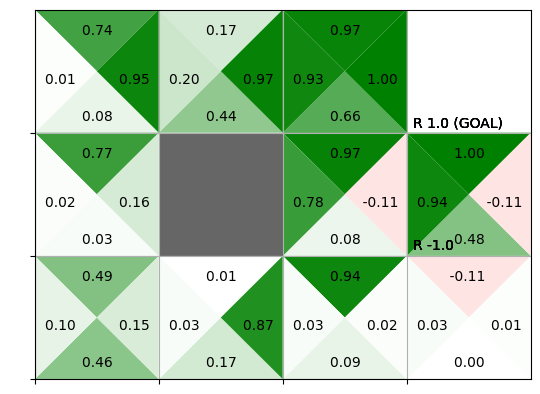

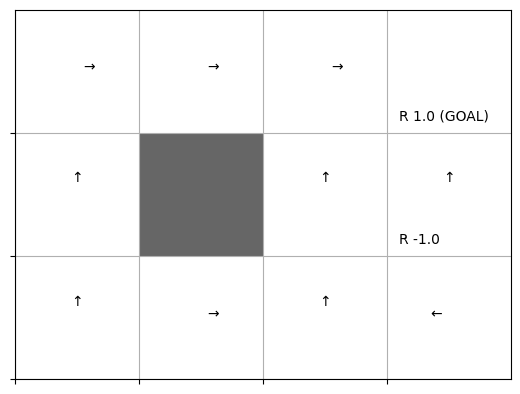

In [11]:
class SarsaOffPolicyAgent:
    def __init__(self):
        self.gamma = 0.9
        self.alpha = 0.8
        self.epsilon = 0.1
        self.action_size = 4

        random_actions = {0:0.25, 1:0.25, 2:0.25, 3:0.25}
        self.pi = defaultdict(lambda: random_actions)
        self.b = defaultdict(lambda: random_actions)
        self.Q = defaultdict(lambda: 0)
        self.memory = deque(maxlen=2)

    def get_action(self, state):
        action_probs = self.b[state]
        actions = list(action_probs.keys())
        probs = list(action_probs.values())
        return np.random.choice(actions, p=probs)

    def reset(self):
        self.memory.clear()

    def update(self, state, action, reward, done):
        self.memory.append((state, action, reward, done))
        if len(self.memory) < 2:
            return

        state, action, reward, done = self.memory[0]
        next_state, next_action, _, _ = self.memory[1]

        if done:
            next_q = 0
            rho = 1
        else:
            next_q = self.Q[next_state, next_action]
            rho = self.pi[next_state][next_action] / self.b[next_state][next_action]

        target = rho * (reward + self.gamma * next_q)
        self.Q[state, action] += (target - self.Q[state, action]) * self.alpha

        self.pi[state] = greedy_probs(self.Q, state, 0)
        self.b[state] = greedy_probs(self.Q, state, self.epsilon)


env = GridWorld()
agent = SarsaOffPolicyAgent()

episodes = 10000
for episode in range(episodes):
    state = env.reset()
    agent.reset()

    while True:
        action = agent.get_action(state)
        next_state, reward, done = env.step(action)

        agent.update(state, action, reward, done)

        if done:
            agent.update(next_state, None, None, None)
            break
        state = next_state

# [그림 6-9] 오프-정책 SARSA로 얻은 결과
env.render_q(agent.Q)


### Q-러닝

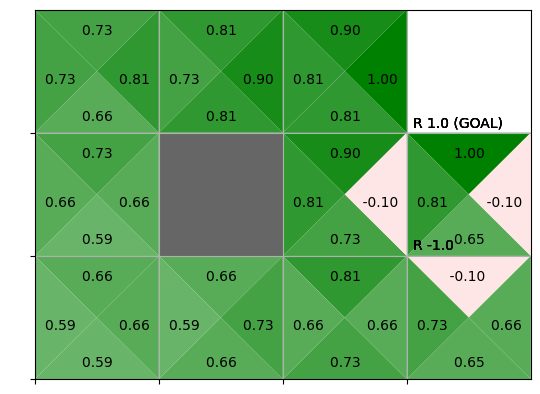

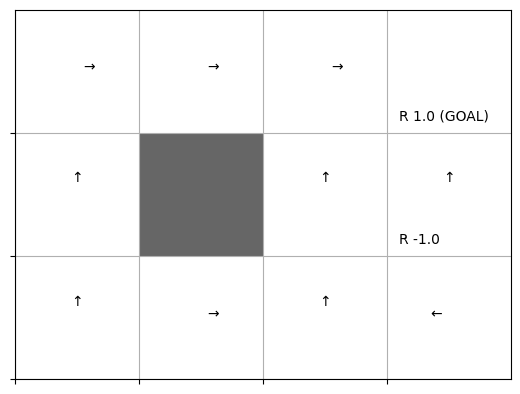

In [12]:
from collections import defaultdict
import numpy as np
from common.gridworld import GridWorld
from common.utils import greedy_probs

class QLearningAgent:
    def __init__(self):
        self.gamma = 0.9
        self.alpha = 0.8
        self.epsilon = 0.1
        self.action_size = 4

        random_actions = {0:0.25, 1:0.25, 2:0.25, 3:0.25}
        self.b = defaultdict(lambda: random_actions)
        self.Q = defaultdict(lambda: 0)

    def get_action(self, state):
        action_probs = self.b[state]
        actions = list(action_probs.keys())
        probs = list(action_probs.values())
        return np.random.choice(actions, p=probs)

    def update(self, state, action, reward, next_state, done):
        if done:
            next_q_max = 0
        else:
            next_qs = [self.Q[next_state, a] for a in range(self.action_size)]
            next_q_max = max(next_qs)

        target = reward + self.gamma * next_q_max
        self.Q[state, action] += (target - self.Q[state, action]) * self.alpha

        self.b[state] = greedy_probs(self.Q, state, epsilon=self.epsilon)


env = GridWorld()
agent = QLearningAgent()

episodes = 10000
for episode in range(episodes):
    state = env.reset()
    #agent.reset()

    while True:
        action = agent.get_action(state)
        next_state, reward, done = env.step(action)

        agent.update(state, action, reward, next_state, done)

        if done:
            break
        state = next_state

env.render_q(agent.Q)